In [1]:
# 【問題1】1次関数

import numpy as np

x_ndarray = np.arange(-50, 50.1, 0.1).reshape([-1, 1])
print(x_ndarray)
print(x_ndarray.shape)


y_ndarray = 1 / 2 * x_ndarray + 1
print(y_ndarray)
print(y_ndarray.shape)

[[-50. ]
 [-49.9]
 [-49.8]
 ...
 [ 49.8]
 [ 49.9]
 [ 50. ]]
(1001, 1)
[[-24.  ]
 [-23.95]
 [-23.9 ]
 ...
 [ 25.9 ]
 [ 25.95]
 [ 26.  ]]
(1001, 1)


In [2]:
 # 【問題2】配列の結合
    
xy_ndarray = np.concatenate([x_ndarray, y_ndarray], axis=1)
print(xy_ndarray)
print(xy_ndarray.shape)

[[-50.   -24.  ]
 [-49.9  -23.95]
 [-49.8  -23.9 ]
 ...
 [ 49.8   25.9 ]
 [ 49.9   25.95]
 [ 50.    26.  ]]
(1001, 2)


In [3]:
# 【問題3】勾配を求める

d_y = y_ndarray[1:] - y_ndarray[:-1]
print(d_y.shape)

d_x = x_ndarray[1:] - x_ndarray[:-1]
print(d_x.shape)

grad = d_y / d_x
print(grad.shape)

(1000, 1)
(1000, 1)
(1000, 1)


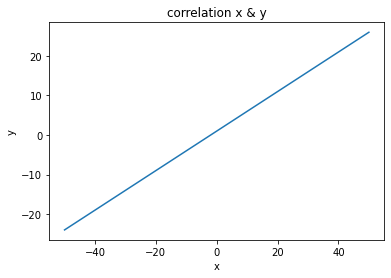

In [4]:
# 【問題4】グラフを描く

import matplotlib.pyplot as plt

plt.title("correlation x & y")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_ndarray, y_ndarray)
plt.show()

(1000, 1)


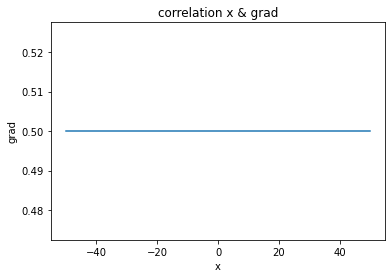

In [5]:
# x_ndarrayの型を(1001, 1)から(1000, 1)にする（最後尾の要素を落とす）
new_x_ndarray = np.delete(x_ndarray, -1)
new_x_ndarray = new_x_ndarray[:, np.newaxis]
print(new_x_ndarray.shape)

plt.title("correlation x & grad")
plt.xlabel("x")
plt.ylabel("grad")
plt.plot(new_x_ndarray, grad)
plt.show()

In [6]:
# 【問題5】Pythonの関数化

def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
    """
    変化量を使い勾配を計算する。

    Parameters
    ----------------
    function : function
      求めたい関数、xのndarrayを入れるとyのndarrayを返すもの。
    x_range : tuple
      np.arange()の引数と同じ方法で範囲を指定する。

    Returns
    ----------------
    array_xy : ndarray, shape(n, 2)
      xとyを結合したもの。nはx_rangeに依存する。
    gradient : ndarray, shape(n-1,)
      関数の勾配。差をとるため要素は1つ減る
    """
    
    
    array_x = np.arange(*x_range).reshape([-1, 1])
    array_y = function(array_x)
    
    d_x = array_x[1:] - array_x[:1]
    d_y = array_y[1:] - array_y[:1]
    
    array_xy = np.concatenate([array_x, array_y], axis=1)
    array_xy_fixed = np.delete(array_xy, -1)
 
    gradient_prev = d_y / d_x
    gradient = gradient_prev.ravel()
    
    return array_xy, gradient


(1001, 2)
[[-50.   -24.  ]
 [-49.9  -23.95]
 [-49.8  -23.9 ]
 ...
 [ 49.8   25.9 ]
 [ 49.9   25.95]
 [ 50.    26.  ]]
(1000,)
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.

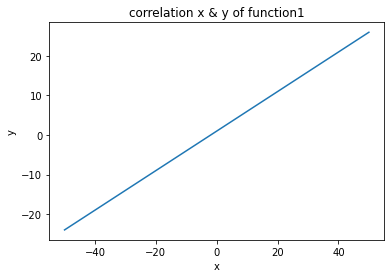

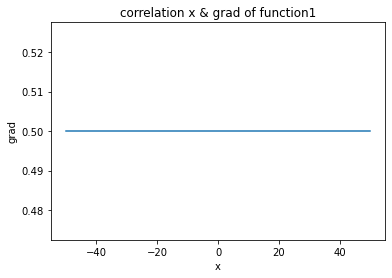

In [7]:
# function1(y = 1 / 2 * x + 1)
def function1(array_x):
    array_y = 1/ 2 * array_x + 1
    return array_y


array_xy, gradient = compute_gradient(function1, (-50, 50.1, 0.1))

# function1の勾配計算結果
print(array_xy.shape)
print(array_xy)
print(gradient.shape)
print(gradient)

# xとfunction1のyの相関図
plt.title("correlation x & y of function1")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(array_xy[:, 0], array_xy[:, 1])
plt.show()

# xとfunction1の勾配の相関図
new_array_xy = array_xy[:-1, 0]
plt.title("correlation x & grad of function1")
plt.xlabel("x")
plt.ylabel("grad")
plt.plot(new_array_xy, gradient)
plt.show()

(1001, 2)
[[ -50.   2500.  ]
 [ -49.9  2490.01]
 [ -49.8  2480.04]
 ...
 [  49.8  2480.04]
 [  49.9  2490.01]
 [  50.   2500.  ]]
(1000,)
[-9.99000000e+01 -9.98000000e+01 -9.97000000e+01 -9.96000000e+01
 -9.95000000e+01 -9.94000000e+01 -9.93000000e+01 -9.92000000e+01
 -9.91000000e+01 -9.90000000e+01 -9.89000000e+01 -9.88000000e+01
 -9.87000000e+01 -9.86000000e+01 -9.85000000e+01 -9.84000000e+01
 -9.83000000e+01 -9.82000000e+01 -9.81000000e+01 -9.80000000e+01
 -9.79000000e+01 -9.78000000e+01 -9.77000000e+01 -9.76000000e+01
 -9.75000000e+01 -9.74000000e+01 -9.73000000e+01 -9.72000000e+01
 -9.71000000e+01 -9.70000000e+01 -9.69000000e+01 -9.68000000e+01
 -9.67000000e+01 -9.66000000e+01 -9.65000000e+01 -9.64000000e+01
 -9.63000000e+01 -9.62000000e+01 -9.61000000e+01 -9.60000000e+01
 -9.59000000e+01 -9.58000000e+01 -9.57000000e+01 -9.56000000e+01
 -9.55000000e+01 -9.54000000e+01 -9.53000000e+01 -9.52000000e+01
 -9.51000000e+01 -9.50000000e+01 -9.49000000e+01 -9.48000000e+01
 -9.47000000e+01 

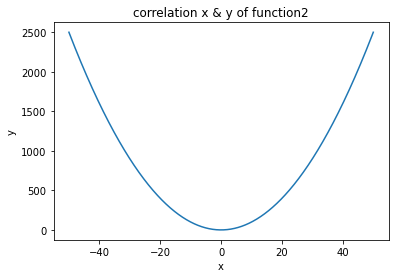

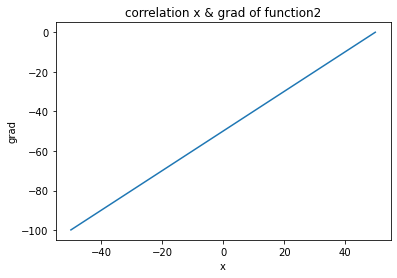

In [8]:
# function2(y = x**2)
def function2(array_x):
    array_y = array_x**2
    return array_y


array_xy2, gradient2 = compute_gradient(function2,  (-50, 50.1, 0.1))

# function2の勾配計算結果
print(array_xy2.shape)
print(array_xy2)
print(gradient2.shape)
print(gradient2)

# xとfunction2のyの相関図
plt.title("correlation x & y of function2")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(array_xy2[:, 0], array_xy2[:, 1])
plt.show()

# n次元行列xとfunction2の勾配の相関図
new_array_xy2 = array_xy2[:-1, 0]
plt.title("correlation x & grad of function2")
plt.xlabel("x")
plt.ylabel("grad")
plt.plot(new_array_xy2, gradient2)
plt.show()

(1001, 2)
[[-5.00000000e+01  5.00000000e+03]
 [-4.99000000e+01  4.98002000e+03]
 [-4.98000000e+01  4.96008000e+03]
 ...
 [ 4.98000000e+01  9.80152798e+14]
 [ 4.99000000e+01  1.05050176e+15]
 [ 5.00000000e+01  1.12589991e+15]]
(1000,)
[-1.99800000e+02 -1.99600000e+02 -1.99400000e+02 -1.99200000e+02
 -1.99000000e+02 -1.98800000e+02 -1.98600000e+02 -1.98400000e+02
 -1.98200000e+02 -1.98000000e+02 -1.97800000e+02 -1.97600000e+02
 -1.97400000e+02 -1.97200000e+02 -1.97000000e+02 -1.96800000e+02
 -1.96600000e+02 -1.96400000e+02 -1.96200000e+02 -1.96000000e+02
 -1.95800000e+02 -1.95600000e+02 -1.95400000e+02 -1.95200000e+02
 -1.95000000e+02 -1.94800000e+02 -1.94600000e+02 -1.94400000e+02
 -1.94200000e+02 -1.94000000e+02 -1.93800000e+02 -1.93600000e+02
 -1.93400000e+02 -1.93200000e+02 -1.93000000e+02 -1.92800000e+02
 -1.92600000e+02 -1.92400000e+02 -1.92200000e+02 -1.92000000e+02
 -1.91800000e+02 -1.91600000e+02 -1.91400000e+02 -1.91200000e+02
 -1.91000000e+02 -1.90800000e+02 -1.90600000e+02 -1

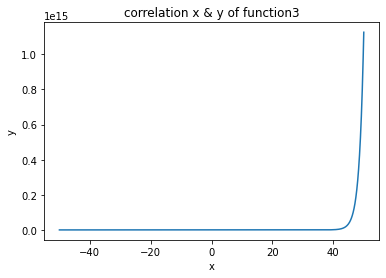

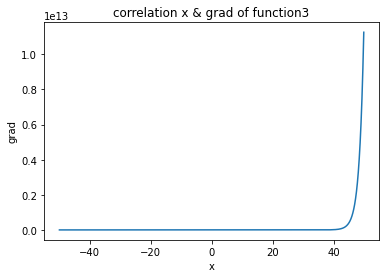

In [9]:
# function3(y = 2*x**2 + 2**x)
def function3(array_x):
    array_y = 2*array_x**2 + 2**array_x
    return array_y


array_xy3, gradient3 = compute_gradient(function3,  (-50, 50.1, 0.1))

# function3の勾配計算結果
print(array_xy3.shape)
print(array_xy3)
print(gradient3.shape)
print(gradient3)

# xとfunction3のyの相関図
plt.title("correlation x & y of function3")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(array_xy3[:, 0], array_xy3[:, 1])
plt.show()

# xとfunction3の勾配の相関図
new_array_xy3 = array_xy3[:-1, 0]
plt.title("correlation x & grad of function3")
plt.xlabel("x")
plt.ylabel("grad")
plt.plot(new_array_xy3, gradient3)
plt.show()

(501, 2)
[[ 0.          0.        ]
 [ 0.1         0.31098359]
 [ 0.2         0.43245484]
 ...
 [49.8         0.69880548]
 [49.9         0.70385354]
 [50.          0.70886129]]
(500,)
[ 3.10983593e+00  2.16227419e+00  1.73581433e+00  1.47781779e+00
  1.29927388e+00  1.16571312e+00  1.06058523e+00  9.74813313e-01
  9.02943218e-01  8.41470985e-01  7.88027207e-01  7.40943370e-01
  6.99005184e-01  6.61304476e-01  6.27146222e-01  5.95987963e-01
  5.67399060e-01  5.41032536e-01  5.16605148e-01  4.93882973e-01
  4.72670814e-01  4.52804257e-01  4.34143647e-01  4.16569444e-01
  3.99978607e-01  3.84281749e-01  3.69400866e-01  3.55267516e-01
  3.41821346e-01  3.29008882e-01  3.16782542e-01  3.05099812e-01
  2.93922563e-01  2.83216474e-01  2.72950550e-01  2.63096710e-01
  2.53629440e-01  2.44525489e-01  2.35763614e-01  2.27324357e-01
  2.19189853e-01  2.11343664e-01  2.03770626e-01  1.96456730e-01
  1.89389002e-01  1.82555406e-01  1.75944758e-01  1.69546644e-01
  1.63351356e-01  1.57349826e-01  1.

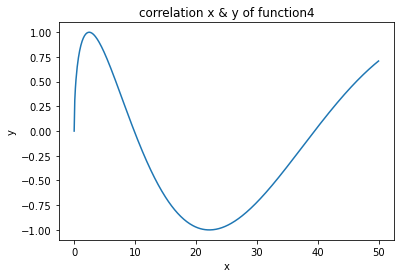

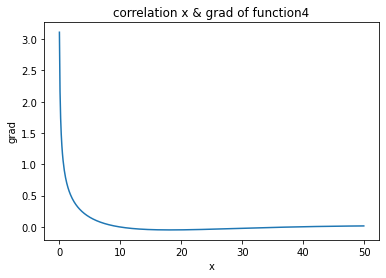

In [10]:
# function4(y = sin(x**{1/2}))
def function4(array_x):
    array_y = np.sin(array_x**0.5)
    return array_y


array_xy4, gradient4 = compute_gradient(function4,  (0, 50.1, 0.1))

# function4の勾配計算結果
print(array_xy4.shape)
print(array_xy4)
print(gradient4.shape)
print(gradient4)

# xとfunction4のyの相関図
plt.title("correlation x & y of function4")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(array_xy4[:, 0], array_xy4[:, 1])
plt.show()

# xとfunction4の勾配の相関図
new_array_xy4 = array_xy4[:-1, 0]
plt.title("correlation x & grad of function4")
plt.xlabel("x")
plt.ylabel("grad")
plt.plot(new_array_xy4, gradient4)
plt.show()

In [11]:
# 【問題6】最小値を求める

# func1のyの最小値
func1_ymin = np.min(array_xy[:, 1])
print("func1の最小値：" + str(func1_ymin))

# func1のyの最小値のインデックス
func1_ymin_ind = np.argmin(array_xy[:, 1])
print("インデックス：" + str(func1_ymin_ind))

# func1のyの最小値の前後の勾配
grad_min = gradient[func1_ymin_ind: func1_ymin_ind+5]
print("最小値前後の勾配" + str(grad_min))

func1の最小値：-24.0
インデックス：0
最小値前後の勾配[0.5 0.5 0.5 0.5 0.5]


In [12]:
# func2
print("func2の最小値：{}（インデックス：{}）".format(np.min(array_xy2[:, 1]), np.argmin(array_xy2[:, 1])))
print("func2の最小値前後の勾配：" + str(gradient2[495: 505]))

func2の最小値：5.048709793414476e-25（インデックス：500）
func2の最小値前後の勾配：[-50.4 -50.3 -50.2 -50.1 -50.  -49.9 -49.8 -49.7 -49.6 -49.5]


In [13]:
# func3
print("func3の最小値：{}（インデックス：{}）".format(np.min(array_xy3[:, 1]), np.argmin(array_xy3[:, 1])))
print("func3の最小値前後の勾配：" + str(gradient3[493: 503]))

func3の最小値：0.9505505632959851（インデックス：498）
func3の最小値前後の勾配：[-101.18664466 -100.98571501 -100.7847206  -100.58365689 -100.38251906
 -100.18130194  -99.98        -99.77860732  -99.57711756  -99.37552397]


In [14]:
# func4
print("func4の最小値：{}（インデックス：{}）".format(np.min(array_xy4[:, 1]), np.argmin(array_xy4[:, 1])))
print("func4の最小値前後の勾配：" + str(gradient4[217: 227]))

func4の最小値：-0.9999997540298113（インデックス：222）
func4の最小値前後の勾配：[-0.04582848 -0.04563777 -0.04544357 -0.04524597 -0.04504503 -0.04484085
 -0.0446335  -0.04442305 -0.04420959 -0.04399317]
